# Preprocessing coin information

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Checking datasets obtained from CoinMarketCap

### All categories

In [3]:
categories_df = pd.read_csv('../../data/csv/coin_categories.csv')
print(categories_df.shape)
categories_df.head()

(246, 11)


,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,66d07f95fd16915e5906f7fb,Sun Pump Ecosystem,Sun Pump Ecosystem,Sun Pump Ecosystem,37,2.144724,3.532119e+08,0.028872,1.705059e+08,290753.077208,2024-08-29T14:08:29.910Z
1,66c739798c27c7444ebf03e8,TRON Memes,TRON Memes,TRON Memes,42,1.038159,3.679773e+08,0.163070,1.861048e+08,261676.277175,2024-08-25T10:28:08.848Z
2,66ba86e19f9f301707348c7c,Tap To Earn (T2E),Tap To Earn (T2E),Tap To Earn (T2E),8,-3.073405,9.782709e+08,0.382580,1.135280e+08,-19.861140,2024-08-20T07:32:40.386Z
3,66a3201fdfec59177a0f3a35,Celebrity Memes,Celebrity Memes,Celebrity Memes,11,6.910239,8.577324e+07,3.099882,1.465736e+07,123.063164,2024-07-26T04:04:15.483Z
4,667238b565e4476fb9e4952a,Intent,Intent,Intent,4,4.854081,4.900159e+07,1.153425,8.714326e+05,37.132250,2024-08-15T08:09:32.649Z


#### Artificial Intelligence category

In [4]:
ai_df = pd.read_csv('../../data/csv/coins_AI.csv')
print(ai_df.shape)
ai_df.head()

(250, 17)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
0,6535,NEAR Protocol,NEAR,near-protocol,443,2020-08-11T00:00:00.000Z,"platform,ai-big-data,staking,coinbase-ventures...",NaN,1.123916e+09,1.209633e+09,20.0,4.001789,1.896790e+08,-0.295862,0.695971,6.834548,4.497676e+09
1,8916,Internet Computer,ICP,internet-computer,291,2021-03-23T00:00:00.000Z,"platform,ai-big-data,smart-contracts,polychain...",NaN,4.698829e+08,5.223637e+08,23.0,7.984759,6.524906e+07,-0.279245,4.461639,10.682161,3.751901e+09
2,3773,Artificial Superintelligence Alliance,FET,artificial-superintelligence-alliance,370,2019-03-02T00:00:00.000Z,"cosmos-ecosystem,ai-big-data,collectibles-nfts...",2.630547e+09,2.520000e+09,2.630547e+09,24.0,1.298860,2.768840e+08,1.142639,9.698876,14.320927,3.273126e+09
3,22974,Bittensor,TAO,bittensor,86,2023-03-06T05:20:00.000Z,"ai-big-data,distributed-computing,oracles,dao,...",2.100000e+07,7.365602e+06,7.365602e+06,38.0,277.748222,6.626699e+07,-0.296370,4.985333,5.307924,2.045783e+09
4,5690,Render,RENDER,render,465,2020-06-11T00:00:00.000Z,"art,media,vr-ar,ai-big-data,distributed-comput...",NaN,3.924605e+08,5.322208e+08,40.0,5.157754,8.485562e+07,-0.694359,3.914209,7.146705,2.024215e+09


In [5]:
# Adding category column
ai_df['category'] = 'AI'

#### Gaming category

In [6]:
gaming_df = pd.read_csv('../../data/csv/coins_gaming.csv')
print(gaming_df.shape)
gaming_df.head()

(400, 17)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
0,10603,Immutable,IMX,immutable-x,307,2021-06-24T00:00:00.000Z,"collectibles-nfts,zero-knowledge-proofs,gaming...",2.000000e+09,1.605299e+09,2.000000e+09,39.0,1.261628,3.083869e+07,-0.009997,0.797788,6.942049,2.025291e+09
1,10804,FLOKI,FLOKI,floki-inu,533,2021-07-09T00:00:00.000Z,"gaming,memes,metaverse,doggone-doggerel,play-t...",NaN,9.582824e+12,9.687656e+12,57.0,0.000126,1.560779e+08,-0.748247,0.498088,6.374825,1.211844e+09
2,28850,Notcoin,NOT,notcoin,162,2024-05-09T15:38:45.000Z,"gaming,binance-launchpool,play-to-earn,web3,te...",NaN,1.024744e+11,1.024744e+11,75.0,0.008203,9.316412e+07,-0.075539,0.270401,1.840816,8.406264e+08
3,6892,MultiversX,EGLD,multiversx-egld,260,2020-09-04T00:00:00.000Z,"pos,enterprise-solutions,distributed-computing...",3.141593e+07,2.729575e+07,2.739262e+07,80.0,26.508606,1.291083e+07,-0.104349,1.273793,-0.861345,7.235724e+08
4,6783,Axie Infinity,AXS,axie-infinity,473,2020-08-31T00:00:00.000Z,"collectibles-nfts,gaming,binance-launchpad,met...",NaN,1.494607e+08,2.700000e+08,84.0,4.507678,1.804156e+07,-0.340318,0.730033,-0.136484,6.737209e+08


In [7]:
# Adding category column
gaming_df['category'] = 'Gaming'

In [8]:
# Identify duplicated rows based on 'name' and 'symbol' columns
duplicates = gaming_df[gaming_df.duplicated(subset=['name', 'symbol'], keep=False)]

# Sort the duplicated rows for better readability
sorted_duplicates = duplicates.sort_values(by=['name', 'symbol'])

# Display the duplicated rows
sorted_duplicates

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category
287,12367,Avaxtars Token,AVXT,avaxtars,6,2021-10-06T01:29:50.000Z,"collectibles-nfts,gaming,avalanche-ecosystem,m...",1.000000e+09,165635.0,300000000.0,NaN,NaN,2.000009e+06,-0.245771,-12.619337,-28.477011,NaN,Gaming
316,19850,Avaxtars Token,AVXT,avaxtars-token,9,2021-10-06T01:29:50.000Z,"collectibles-nfts,gaming,avalanche-ecosystem,m...",1.000000e+09,0.0,300000000.0,8794.0,0.000079,0.000000e+00,0.000000,0.000000,5.905746,0.0,Gaming


In [9]:
gaming_df = gaming_df.drop(index=316)

#### Meme category

In [10]:
meme_df = pd.read_csv('../../data/csv/coins_meme.csv')
print(meme_df.shape)
meme_df.head()

(500, 17)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
0,74,Dogecoin,DOGE,dogecoin,1054,2013-12-15T00:00:00.000Z,"mineable,pow,scrypt,medium-of-exchange,memes,p...",NaN,1.459003e+11,1.459003e+11,8.0,0.102218,6.215999e+08,-0.466465,0.020834,5.248387,1.491364e+10
1,5994,Shiba Inu,SHIB,shiba-inu,864,2020-08-01T00:00:00.000Z,"memes,ethereum-ecosystem,doggone-doggerel",NaN,5.892696e+14,5.895185e+14,13.0,0.000013,1.625451e+08,-0.741397,-0.237436,1.439144,7.901347e+09
2,24478,Pepe,PEPE,pepe,438,2023-04-17T06:18:08.000Z,memes,4.206900e+14,4.206899e+14,4.206899e+14,26.0,0.000007,1.011830e+09,-0.638933,2.667932,1.283228,3.105373e+09
3,28752,dogwifhat,WIF,dogwifhat,509,2023-12-19T09:08:50.000Z,"memes,solana-ecosystem,doggone-doggerel",NaN,9.988455e+08,9.988455e+08,47.0,1.641141,3.686043e+08,-1.648301,2.366426,9.847439,1.639247e+09
4,10804,FLOKI,FLOKI,floki-inu,533,2021-07-09T00:00:00.000Z,"gaming,memes,metaverse,doggone-doggerel,play-t...",NaN,9.582825e+12,9.687657e+12,57.0,0.000126,1.568741e+08,-0.872482,0.239698,6.720777,1.212119e+09


In [11]:
# Adding category column
meme_df['category'] = 'Meme'

#### RWA category

In [13]:
rwa_df = pd.read_csv('../../data/csv/coins_RWA.csv')
print(rwa_df.shape)
rwa_df.head()

(100, 17)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
0,5805,Avalanche,AVAX,avalanche,771,2020-07-13T00:00:00.000Z,"defi,smart-contracts,three-arrows-capital-port...",7.157487e+08,4.052731e+08,4.452762e+08,12.0,23.885204,2.270866e+08,-0.861656,-0.501940,10.478792,9.680030e+09
1,1975,Chainlink,LINK,chainlink,1836,2017-09-20T00:00:00.000Z,"platform,defi,oracles,smart-contracts,substrat...",NaN,6.081000e+08,1.000000e+09,15.0,10.512741,2.060604e+08,-0.551953,-0.383679,2.059584,6.392797e+09
2,3077,VeChain,VET,vechain,294,2017-08-22T00:00:00.000Z,"logistics,data-provenance,iot,smart-contracts,...",8.671263e+10,8.098504e+10,8.598504e+10,45.0,0.021836,1.436524e+07,-0.599660,1.472654,4.221144,1.768349e+09
3,1518,Maker,MKR,maker,501,2017-01-29T00:00:00.000Z,"store-of-value,defi,dao,polychain-capital-port...",1.005577e+06,9.332982e+05,9.776310e+05,49.0,1579.765770,6.378971e+07,-0.272265,-3.829786,-6.044083,1.474393e+09
4,3155,Quant,QNT,quant,261,2018-08-10T00:00:00.000Z,"platform,interoperability,real-world-assets",1.488136e+07,1.207274e+07,1.488136e+07,68.0,73.154733,1.820518e+07,-0.101999,1.923497,20.009958,8.831779e+08


In [14]:
# Adding category column
rwa_df['category'] = 'RWA'

### Top cryptos based on CoinMarketCap rank

In [16]:
crypto_df = pd.read_csv('../../data/csv/coins_top.csv')
print(crypto_df.shape)
crypto_df.head()

(50, 19)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,last_updated,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
0,1,Bitcoin,BTC,bitcoin,11674,2010-07-13T00:00:00.000Z,"mineable, pow, sha-256, store-of-value, state-...",21000000.0,1.975286e+07,1.975286e+07,NaN,1,2024-09-11T22:17:00.000Z,57337.047571,3.721383e+10,-0.104218,-0.574678,-1.653611,1.132571e+12
1,1027,Ethereum,ETH,ethereum,9270,2015-08-07T00:00:00.000Z,"pos, smart-contracts, ethereum-ecosystem, coin...",NaN,1.203281e+08,1.203281e+08,NaN,2,2024-09-11T22:16:00.000Z,2342.495513,1.548140e+10,-0.040923,-1.728042,-5.051442,2.818681e+11
2,825,Tether USDt,USDT,tether,96895,2015-02-25T00:00:00.000Z,"stablecoin, asset-backed-stablecoin, avalanche...",NaN,1.183764e+11,1.202378e+11,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",3,2024-09-11T22:16:00.000Z,1.000158,5.410084e+10,0.002403,0.017798,0.014899,1.183951e+11
3,1839,BNB,BNB,bnb,2225,2017-07-25T00:00:00.000Z,"marketplace, centralized-exchange, payments, s...",NaN,1.459343e+08,1.459343e+08,NaN,4,2024-09-11T22:16:00.000Z,529.841525,1.632983e+09,-0.057604,1.813095,3.256408,7.732203e+10
4,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"pos, platform, solana-ecosystem, cms-holdings-...",NaN,4.679328e+08,5.842955e+08,NaN,5,2024-09-11T22:16:00.000Z,132.499975,2.134746e+09,0.031213,-2.389366,-1.481834,6.200109e+10


In [17]:
# Getting basic information
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     int64  
 1   name                50 non-null     object 
 2   symbol              50 non-null     object 
 3   slug                50 non-null     object 
 4   num_market_pairs    50 non-null     int64  
 5   date_added          50 non-null     object 
 6   tags                49 non-null     object 
 7   max_supply          20 non-null     float64
 8   circulating_supply  50 non-null     float64
 9   total_supply        50 non-null     float64
 10  platform            20 non-null     object 
 11  cmc_rank            50 non-null     int64  
 12  last_updated        50 non-null     object 
 13  price               50 non-null     float64
 14  volume_24h          50 non-null     float64
 15  percent_change_1h   50 non-null     float64
 16  percent_ch

In [18]:
# Drop columns due to null values
crypto_df.drop(columns=['platform', 'last_updated'], inplace=True)
crypto_df.shape

(50, 17)

In [19]:
# Adding category column
crypto_df['category'] = 'Top'

## Concatenating data

In [20]:
combined_df = pd.concat([ai_df, gaming_df, meme_df, rwa_df, crypto_df[:38]])

print(combined_df.shape)
combined_df.head()

(1287, 18)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category
0,6535,NEAR Protocol,NEAR,near-protocol,443,2020-08-11T00:00:00.000Z,"platform,ai-big-data,staking,coinbase-ventures...",NaN,1.123916e+09,1.209633e+09,20.0,4.001789,1.896790e+08,-0.295862,0.695971,6.834548,4.497676e+09,AI
1,8916,Internet Computer,ICP,internet-computer,291,2021-03-23T00:00:00.000Z,"platform,ai-big-data,smart-contracts,polychain...",NaN,4.698829e+08,5.223637e+08,23.0,7.984759,6.524906e+07,-0.279245,4.461639,10.682161,3.751901e+09,AI
2,3773,Artificial Superintelligence Alliance,FET,artificial-superintelligence-alliance,370,2019-03-02T00:00:00.000Z,"cosmos-ecosystem,ai-big-data,collectibles-nfts...",2.630547e+09,2.520000e+09,2.630547e+09,24.0,1.298860,2.768840e+08,1.142639,9.698876,14.320927,3.273126e+09,AI
3,22974,Bittensor,TAO,bittensor,86,2023-03-06T05:20:00.000Z,"ai-big-data,distributed-computing,oracles,dao,...",2.100000e+07,7.365602e+06,7.365602e+06,38.0,277.748222,6.626699e+07,-0.296370,4.985333,5.307924,2.045783e+09,AI
4,5690,Render,RENDER,render,465,2020-06-11T00:00:00.000Z,"art,media,vr-ar,ai-big-data,distributed-comput...",NaN,3.924605e+08,5.322208e+08,40.0,5.157754,8.485562e+07,-0.694359,3.914209,7.146705,2.024215e+09,AI


### Preprocessing combined data

In [21]:
# Identify duplicated rows based on 'name' and 'symbol' columns
duplicates = combined_df[combined_df.duplicated(subset=['name', 'symbol'], keep=False)]

# Sort the duplicated rows for better readability
sorted_duplicates = duplicates.sort_values(by=['name', 'symbol'])

# Display the duplicated rows
sorted_duplicates

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category
121,8378,Akita Inu,AKITA,akita-inu,62,2021-02-02T00:00:00.000Z,"gaming,memes,avalanche-ecosystem,doggone-doggerel",NaN,6.807154e+13,1.000000e+14,1180.0,8.348372e-08,4.168812e+05,-0.773773,0.682065,47.383858,5.682866e+06,Gaming
100,8378,Akita Inu,AKITA,akita-inu,62,2021-02-02T00:00:00.000Z,"gaming,memes,avalanche-ecosystem,doggone-doggerel",NaN,6.807154e+13,1.000000e+14,1180.0,8.336058e-08,4.162746e+05,-0.754450,0.646233,46.996099,5.674483e+06,Meme
238,19164,Altered State Token,ASTO,altered-state-token,27,2022-03-30T01:25:54.000Z,"sports,ai-big-data,collectibles-nfts,gaming,co...",2.384000e+09,0.000000e+00,2.384000e+09,2694.0,1.019228e-02,4.246563e+06,-0.240491,-1.176434,0.723765,0.000000e+00,AI
304,19164,Altered State Token,ASTO,altered-state-token,27,2022-03-30T01:25:54.000Z,"sports,ai-big-data,collectibles-nfts,gaming,co...",2.384000e+09,0.000000e+00,2.384000e+09,2695.0,1.019027e-02,4.270048e+06,-0.296188,-1.195019,0.699912,0.000000e+00,Gaming
76,29978,Apeiron,APRS,apeiron,13,2024-03-26T12:28:29.000Z,"ai-big-data,gaming",1.000000e+09,8.763081e+07,1.000000e+09,826.0,1.821870e-01,3.252066e+06,0.102646,2.284017,-10.212834,1.596519e+07,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,14822,Victoria VR,VR,victoria-vr,27,2021-11-19T05:45:39.000Z,"vr-ar,ai-big-data,collectibles-nfts,gaming,eth...",1.680000e+10,5.336247e+09,1.680000e+10,628.0,6.043212e-03,5.009749e+06,0.275738,-1.146989,-4.232195,3.224808e+07,Gaming
144,14133,WAM,WAM,wam-app,21,2021-12-20T21:07:01.000Z,"platform,ai-big-data,collectibles-nfts,gaming,...",NaN,4.647804e+08,1.000000e+09,1670.0,2.574504e-03,1.184213e+05,0.231348,0.351079,-1.767250,1.196579e+06,AI
173,14133,WAM,WAM,wam-app,21,2021-12-20T21:07:01.000Z,"platform,ai-big-data,collectibles-nfts,gaming,...",NaN,4.647804e+08,1.000000e+09,1671.0,2.575008e-03,1.188215e+05,0.244391,0.573251,-1.602100,1.196813e+06,Gaming
145,4978,Wownero,WOW,wownero,4,2020-05-25T00:00:00.000Z,"mineable,pow,events,gambling,store-of-value,vr...",1.844674e+08,6.613944e+07,6.613944e+07,1452.0,3.879883e-02,1.488008e+06,1.215449,-3.145400,-9.118842,2.566133e+06,Gaming


In [22]:
# Dropping duplicates
combined_df = combined_df.drop_duplicates(subset=['name', 'symbol'])
combined_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category
0,6535,NEAR Protocol,NEAR,near-protocol,443,2020-08-11T00:00:00.000Z,"platform,ai-big-data,staking,coinbase-ventures...",NaN,1.123916e+09,1.209633e+09,20.0,4.001789,1.896790e+08,-0.295862,0.695971,6.834548,4.497676e+09,AI
1,8916,Internet Computer,ICP,internet-computer,291,2021-03-23T00:00:00.000Z,"platform,ai-big-data,smart-contracts,polychain...",NaN,4.698829e+08,5.223637e+08,23.0,7.984759,6.524906e+07,-0.279245,4.461639,10.682161,3.751901e+09,AI
2,3773,Artificial Superintelligence Alliance,FET,artificial-superintelligence-alliance,370,2019-03-02T00:00:00.000Z,"cosmos-ecosystem,ai-big-data,collectibles-nfts...",2.630547e+09,2.520000e+09,2.630547e+09,24.0,1.298860,2.768840e+08,1.142639,9.698876,14.320927,3.273126e+09,AI
3,22974,Bittensor,TAO,bittensor,86,2023-03-06T05:20:00.000Z,"ai-big-data,distributed-computing,oracles,dao,...",2.100000e+07,7.365602e+06,7.365602e+06,38.0,277.748222,6.626699e+07,-0.296370,4.985333,5.307924,2.045783e+09,AI
4,5690,Render,RENDER,render,465,2020-06-11T00:00:00.000Z,"art,media,vr-ar,ai-big-data,distributed-comput...",NaN,3.924605e+08,5.322208e+08,40.0,5.157754,8.485562e+07,-0.694359,3.914209,7.146705,2.024215e+09,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,3897,OKB,OKB,okb,128,2019-04-30T00:00:00.000Z,"marketplace, centralized-exchange, discount-to...",NaN,6.000000e+07,3.000000e+08,33.0,39.101564,3.369855e+06,-0.411406,0.802337,6.124244,2.346094e+09,Top
33,4847,Stacks,STX,stacks,194,2019-10-28T00:00:00.000Z,"mineable, platform, collectibles-nfts, defi, s...",1.818000e+09,1.485751e+09,1.818000e+09,34.0,1.572027,9.169231e+07,0.362933,-2.750646,6.379012,2.335642e+09,Top
34,7278,Aave,AAVE,aave,932,2020-10-02T00:00:00.000Z,"defi, dao, yield-farming, three-arrows-capital...",NaN,1.492996e+07,1.600000e+07,35.0,148.748123,4.364524e+08,-0.415193,-0.861081,8.730506,2.220803e+09,Top
35,2280,Filecoin,FIL,filecoin,516,2017-12-13T00:00:00.000Z,"mineable, distributed-computing, filesharing, ...",NaN,5.853125e+08,1.959975e+09,36.0,3.600510,1.027917e+08,-0.125778,-1.464043,4.923568,2.107424e+09,Top


In [23]:
# Checking null values
combined_df.isnull().sum()

id                      0
name                    0
symbol                  0
slug                    0
num_market_pairs        0
date_added              0
tags                    1
max_supply            426
circulating_supply      0
total_supply            0
cmc_rank              229
price                 229
volume_24h              0
percent_change_1h       0
percent_change_24h      0
percent_change_7d       0
market_cap            229
category                0
dtype: int64

In [24]:
# Dropping columns due to high null values
combined_df = combined_df.drop(columns=['max_supply', 'cmc_rank'])

In [25]:
# Drop null values
combined_df.dropna(inplace=True)

In [26]:
# Checking null values by column
print(combined_df.shape)
combined_df.isnull().sum()

(1000, 16)


id                    0
name                  0
symbol                0
slug                  0
num_market_pairs      0
date_added            0
tags                  0
circulating_supply    0
total_supply          0
price                 0
volume_24h            0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
market_cap            0
category              0
dtype: int64

In [27]:
# Check 5 first rows
combined_df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category
0,6535,NEAR Protocol,NEAR,near-protocol,443,2020-08-11T00:00:00.000Z,"platform,ai-big-data,staking,coinbase-ventures...",1.123916e+09,1.209633e+09,4.001789,1.896790e+08,-0.295862,0.695971,6.834548,4.497676e+09,AI
1,8916,Internet Computer,ICP,internet-computer,291,2021-03-23T00:00:00.000Z,"platform,ai-big-data,smart-contracts,polychain...",4.698829e+08,5.223637e+08,7.984759,6.524906e+07,-0.279245,4.461639,10.682161,3.751901e+09,AI
2,3773,Artificial Superintelligence Alliance,FET,artificial-superintelligence-alliance,370,2019-03-02T00:00:00.000Z,"cosmos-ecosystem,ai-big-data,collectibles-nfts...",2.520000e+09,2.630547e+09,1.298860,2.768840e+08,1.142639,9.698876,14.320927,3.273126e+09,AI
3,22974,Bittensor,TAO,bittensor,86,2023-03-06T05:20:00.000Z,"ai-big-data,distributed-computing,oracles,dao,...",7.365602e+06,7.365602e+06,277.748222,6.626699e+07,-0.296370,4.985333,5.307924,2.045783e+09,AI
4,5690,Render,RENDER,render,465,2020-06-11T00:00:00.000Z,"art,media,vr-ar,ai-big-data,distributed-comput...",3.924605e+08,5.322208e+08,5.157754,8.485562e+07,-0.694359,3.914209,7.146705,2.024215e+09,AI


### Getting exchanges list by coins

In [29]:
exchanges_df = pd.read_csv('../../data/csv/exchanges_list.csv')
print(exchanges_df.shape)
exchanges_df.head()

(951, 4)


,crypto_id,exchange_id,exchange_name,exchange_slug
0,1,"[270, 7680, 21, 9200, 521, 10361, 407, 9867, 1...","['Binance', 'DOEX', 'BTCC', 'Zedcex Exchange',...","['binance', 'doex', 'btcc', 'zedcex-exchange',..."
1,10040,"[302, 380, 6706, 1344, 1281, 1302]","['Gate.io', 'LATOKEN', 'PancakeSwap v3 (BSC)',...","['gate-io', 'latoken', 'pancakeswap-v3', 'panc..."
2,10046,"[102, 302, 544, 350, 1069]","['HTX', 'Gate.io', 'MEXC', 'CoinEx', 'Uniswap ...","['htx', 'gate-io', 'mexc', 'coinex', 'uniswap-..."
3,10047,"[433, 102, 302, 311, 350, 6706, 1069, 1344, 6444]","['Bitrue', 'HTX', 'Gate.io', 'KuCoin', 'CoinEx...","['bitrue', 'htx', 'gate-io', 'kucoin', 'coinex..."
4,10180,"[333, 513, 406, 1064, 102, 525, 302, 544, 955,...","['LBank', 'Bitget', 'BitMart', 'BingX', 'HTX',...","['lbank', 'bitget', 'bitmart', 'bingx', 'htx',..."


As its mentioned in **'Preprocessing-exchanges.ipynb'**, the 49 missing coins are due to not having exchange information, with the next code we are going to replace fill them with empty lists.

### Merging exchanges and coins by the id

In [30]:
final = pd.merge(combined_df, exchanges_df, left_on='id', right_on='crypto_id', how='left')
exchanges_columns = exchanges_df.columns

# If the exchanges columns are empty, they are replaced with an empty list
for col in exchanges_columns:
    final[col] = final[col].apply(lambda x: [] if pd.isna(x) else x)

print(final.shape)
final.head()

(1000, 20)


,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category,crypto_id,exchange_id,exchange_name,exchange_slug
0,6535,NEAR Protocol,NEAR,near-protocol,443,2020-08-11T00:00:00.000Z,"platform,ai-big-data,staking,coinbase-ventures...",1.123916e+09,1.209633e+09,4.001789,1.896790e+08,-0.295862,0.695971,6.834548,4.497676e+09,AI,6535.0,"[270, 7680, 21, 521, 407, 1188, 9867, 294, 333...","['Binance', 'DOEX', 'BTCC', 'Bybit', 'DigiFine...","['binance', 'doex', 'btcc', 'bybit', 'digifine..."
1,8916,Internet Computer,ICP,internet-computer,291,2021-03-23T00:00:00.000Z,"platform,ai-big-data,smart-contracts,polychain...",4.698829e+08,5.223637e+08,7.984759,6.524906e+07,-0.279245,4.461639,10.682161,3.751901e+09,AI,8916.0,"[270, 21, 521, 10361, 407, 1188, 9867, 294, 33...","['Binance', 'BTCC', 'Bybit', 'CoinUp.io', 'Dig...","['binance', 'btcc', 'bybit', 'coinup-io', 'dig..."
2,3773,Artificial Superintelligence Alliance,FET,artificial-superintelligence-alliance,370,2019-03-02T00:00:00.000Z,"cosmos-ecosystem,ai-big-data,collectibles-nfts...",2.520000e+09,2.630547e+09,1.298860,2.768840e+08,1.142639,9.698876,14.320927,3.273126e+09,AI,3773.0,"[270, 7680, 21, 9200, 521, 10361, 407, 1188, 9...","['Binance', 'DOEX', 'BTCC', 'Zedcex Exchange',...","['binance', 'doex', 'btcc', 'zedcex-exchange',..."
3,22974,Bittensor,TAO,bittensor,86,2023-03-06T05:20:00.000Z,"ai-big-data,distributed-computing,oracles,dao,...",7.365602e+06,7.365602e+06,277.748222,6.626699e+07,-0.296370,4.985333,5.307924,2.045783e+09,AI,22974.0,"[270, 521, 9867, 333, 6137, 513, 943, 1653, 57...","['Binance', 'Bybit', 'KCEX', 'LBank', 'Toobit'...","['binance', 'bybit', 'kcex', 'lbank', 'toobit'..."
4,5690,Render,RENDER,render,465,2020-06-11T00:00:00.000Z,"art,media,vr-ar,ai-big-data,distributed-comput...",3.924605e+08,5.322208e+08,5.157754,8.485562e+07,-0.694359,3.914209,7.146705,2.024215e+09,AI,5690.0,"[270, 521, 9867, 294, 333, 6137, 513, 943, 929...","['Binance', 'Bybit', 'KCEX', 'OKX', 'LBank', '...","['binance', 'bybit', 'kcex', 'okx', 'lbank', '..."


In [32]:
final = final.drop(columns=['crypto_id'])

In [33]:
# Checking basic info
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1000 non-null   int64  
 1   name                1000 non-null   object 
 2   symbol              1000 non-null   object 
 3   slug                1000 non-null   object 
 4   num_market_pairs    1000 non-null   int64  
 5   date_added          1000 non-null   object 
 6   tags                1000 non-null   object 
 7   circulating_supply  1000 non-null   float64
 8   total_supply        1000 non-null   float64
 9   price               1000 non-null   float64
 10  volume_24h          1000 non-null   float64
 11  percent_change_1h   1000 non-null   float64
 12  percent_change_24h  1000 non-null   float64
 13  percent_change_7d   1000 non-null   float64
 14  market_cap          1000 non-null   float64
 15  category            1000 non-null   object 
 16  exchang

In [35]:
# Saving the clean dataset
final.to_csv('../../data/csv/crypto_information.csv', index=False)

# Plotting

Showing coins sorted by market cap

In [37]:
# Sorting by market cap
f_s_market_sorted_df = final.sort_values(by='market_cap', ascending=False)

f_s_market_sorted_df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,category,exchange_id,exchange_name,exchange_slug
972,1,Bitcoin,BTC,bitcoin,11674,2010-07-13T00:00:00.000Z,"mineable, pow, sha-256, store-of-value, state-...",1.975286e+07,1.975286e+07,57337.047571,3.721383e+10,-0.104218,-0.574678,-1.653611,1.132571e+12,Top,"[270, 7680, 21, 9200, 521, 10361, 407, 9867, 1...","['Binance', 'DOEX', 'BTCC', 'Zedcex Exchange',...","['binance', 'doex', 'btcc', 'zedcex-exchange',..."
973,1027,Ethereum,ETH,ethereum,9270,2015-08-07T00:00:00.000Z,"pos, smart-contracts, ethereum-ecosystem, coin...",1.203281e+08,1.203281e+08,2342.495513,1.548140e+10,-0.040923,-1.728042,-5.051442,2.818681e+11,Top,"[270, 7680, 21, 9200, 521, 10361, 407, 9867, 1...","['Binance', 'DOEX', 'BTCC', 'Zedcex Exchange',...","['binance', 'doex', 'btcc', 'zedcex-exchange',..."
974,825,Tether USDt,USDT,tether,96895,2015-02-25T00:00:00.000Z,"stablecoin, asset-backed-stablecoin, avalanche...",1.183764e+11,1.202378e+11,1.000158,5.410084e+10,0.002403,0.017798,0.014899,1.183951e+11,Top,"[270, 521, 294, 513, 1133, 1149, 501, 9450, 52...","['Binance', 'Bybit', 'OKX', 'Bitget', 'TruBit ...","['binance', 'bybit', 'okx', 'bitget', 'trubit-..."
975,1839,BNB,BNB,bnb,2225,2017-07-25T00:00:00.000Z,"marketplace, centralized-exchange, payments, s...",1.459343e+08,1.459343e+08,529.841525,1.632983e+09,-0.057604,1.813095,3.256408,7.732203e+10,Top,"[270, 21, 9200, 521, 10361, 407, 9867, 1188, 9...","['Binance', 'BTCC', 'Zedcex Exchange', 'Bybit'...","['binance', 'btcc', 'zedcex-exchange', 'bybit'..."
976,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"pos, platform, solana-ecosystem, cms-holdings-...",4.679328e+08,5.842955e+08,132.499975,2.134746e+09,0.031213,-2.389366,-1.481834,6.200109e+10,Top,"[270, 7680, 21, 521, 10361, 407, 9867, 1188, 2...","['Binance', 'DOEX', 'BTCC', 'Bybit', 'CoinUp.i...","['binance', 'doex', 'btcc', 'bybit', 'coinup-i..."


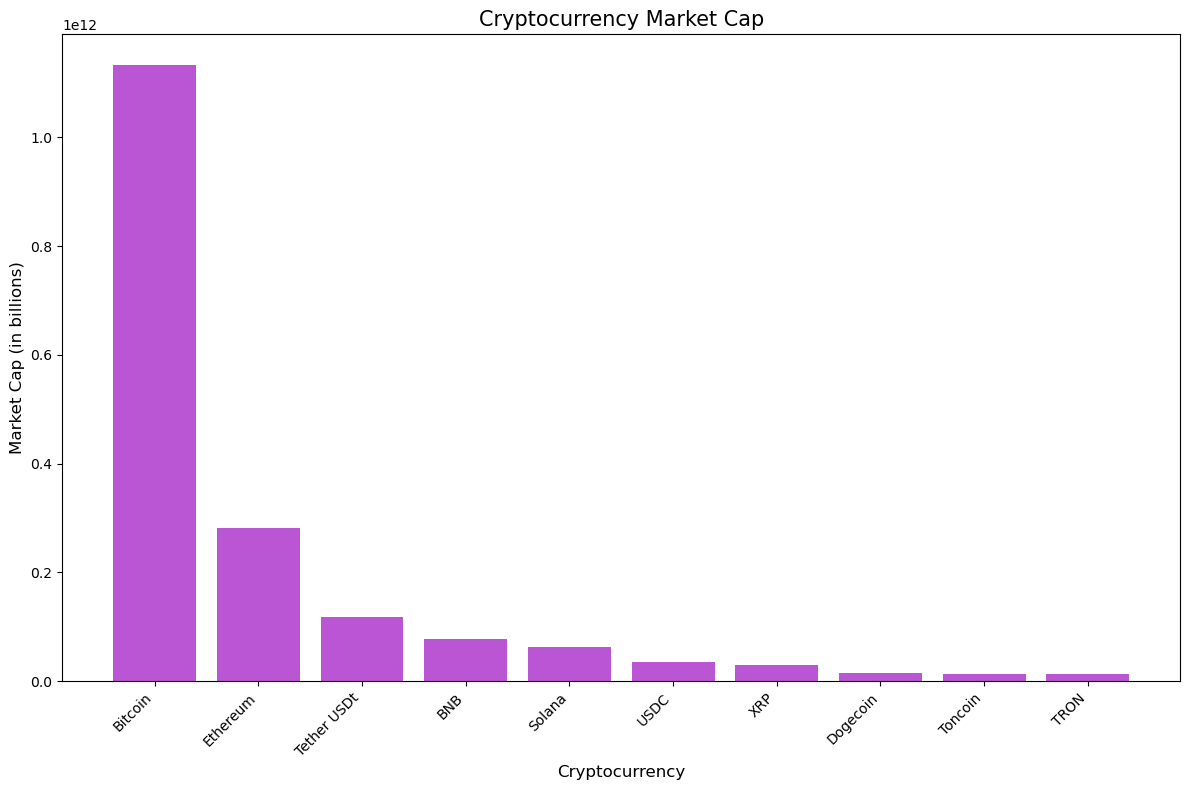

In [39]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(f_s_market_sorted_df['name'].head(10), f_s_market_sorted_df['market_cap'].head(10), color='mediumorchid')

# Add labels and title
plt.xlabel('Cryptocurrency', fontsize=12)
plt.ylabel('Market Cap (in billions)', fontsize=12)
plt.title('Cryptocurrency Market Cap', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()